# **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
!pip install scikit-learn
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
x,y = make_classification(n_samples = 300,
                          n_features=1,
                          n_classes=2,
                          n_clusters_per_class=1,
                          flip_y=0.03,
                          n_informative=1,
                          n_redundant=0,
    n_repeated=0)

In [ ]:
data = pd.DataFrame({'x':x.flatten(), 'y':y})

In [ ]:
data

,x,y
0,-0.621341,0
1,1.075637,1
2,0.141851,1
3,1.125634,1
4,1.834327,0
...,...,...
295,-1.269722,0
296,-1.149532,0
297,-0.889906,0
298,-0.425869,0


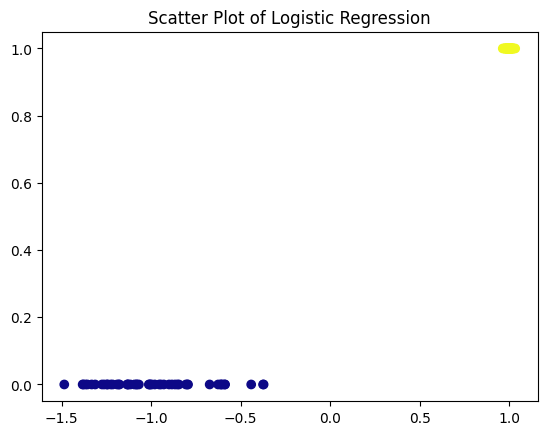

In [ ]:
plt.scatter(x, y, c=y, cmap='plasma')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

# **Split the Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.5, random_state=1)


# **Initialize and Fit the Logistic Regression Model**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [ ]:
print(log_reg.coef_)


[[3.47772673]]


In [ ]:
print(log_reg.intercept_)

[0.28695415]


# **Make Predictions**


In [ ]:
y_pred = log_reg.predict(x_test)

# **Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

array([[67,  5],
       [ 8, 70]])

# **Plot ROC Curve and Calculate AUC Score**

In [ ]:
y_prob = log_reg.predict_proba(x_test)[:, 1]  # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

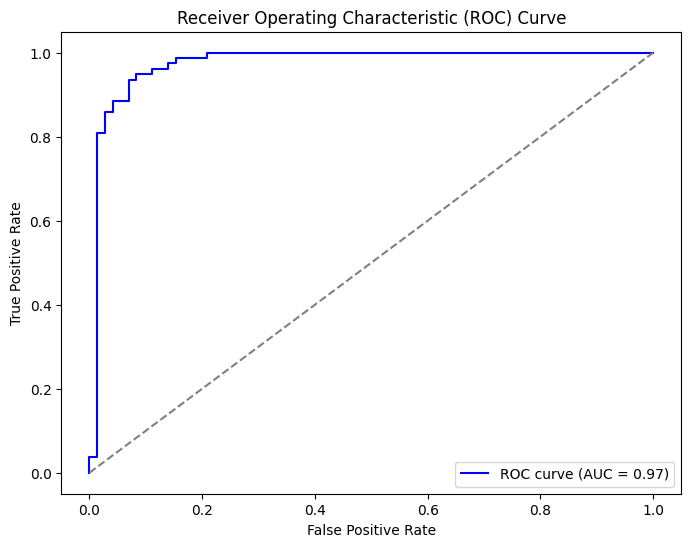

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()